# Run Prevention

In [140]:
#Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [141]:
datapa = pd.read_csv('ippa.csv')
datapa.shape

(799, 37)

In [142]:
datainn = pd.read_csv('ipinn.csv')
datainn.shape

(799, 29)

## Estimating the offensive team ERA, ERA+, FIP based on Innings played

### Training the model with what pitchers can do

In [209]:
inn_era = pd.read_csv('ipinn.csv')
inn_era.drop(['FIP', 'ERA+'], axis=1, inplace=True)
inn_fip = pd.read_csv('ipinn.csv')
inn_fip.drop(['ERA', 'ERA+'], axis=1, inplace=True)
inn_eraplus = pd.read_csv('ipinn.csv')
inn_eraplus.drop(['FIP', 'ERA'], axis=1, inplace=True)

In [210]:
inn_eraplus.head

<bound method NDFrame.head of                 Player  Age   Tm  Year   ERA+  2B  3B   AB     BA  BAbip ...   \
0        Jimmie Sherfy   26  ARI  2018  266.0   0   0   55  0.145  0.179 ...    
1       T.J. McFarland   29  ARI  2018  217.0  14   0  268  0.239  0.269 ...    
2        Clay Buchholz   33  ARI  2018  215.0  19   1  363  0.220  0.256 ...    
3     Yoshihisa Hirano   34  ARI  2018  178.0   7   2  235  0.209  0.251 ...    
4           Yoan Lopez   25  ARI  2018  149.0   1   1   33  0.212  0.250 ...    
5        Andrew Chafin   28  ARI  2018  140.0  11   1  181  0.227  0.313 ...    
6       Patrick Corbin   28  ARI  2018  137.0  43   0  742  0.218  0.304 ...    
7       Silvino Bracho   25  ARI  2018  137.0   7   1  112  0.223  0.299 ...    
8         Zack Greinke   34  ARI  2018  135.0  37   2  784  0.231  0.273 ...    
9       Taijuan Walker   25  ARI  2018  128.0   2   0   51  0.294  0.341 ...    
10      Archie Bradley   25  ARI  2018  119.0  12   1  271  0.229  0.283 ...   

PRE-PROCESSING DATA

In [211]:
inn_era.columns.get_loc("ERA")

4

In [212]:
inn_era.shape

(799, 27)

In [213]:
inn_era = inn_era.dropna()

In [214]:
inn_era.isnull().sum(axis = 0)

Player    0
Age       0
Tm        0
Year      0
ERA       0
2B        0
3B        0
AB        0
BA        0
BAbip     0
BB        0
CS        0
G         0
GDP       0
GS        0
H         0
HBP       0
HR        0
IBB       0
OBP       0
OPS       0
R         0
SB        0
SF        0
SH        0
SLG       0
SO        0
dtype: int64

In [215]:
inn_fip.columns.get_loc("FIP")

4

In [216]:
inn_fip.shape

(799, 27)

In [217]:
inn_fip = inn_fip.dropna()

In [218]:
inn_fip.isnull().sum(axis = 0)

Player    0
Age       0
Tm        0
Year      0
FIP       0
2B        0
3B        0
AB        0
BA        0
BAbip     0
BB        0
CS        0
G         0
GDP       0
GS        0
H         0
HBP       0
HR        0
IBB       0
OBP       0
OPS       0
R         0
SB        0
SF        0
SH        0
SLG       0
SO        0
dtype: int64

inn_eraplus.columns.get_loc("ERA+")

In [219]:
#Splitting ERA to features vs dependent
iera = list(range(5,27))
X1e = inn_era.iloc[:, iera].values
y1e = inn_era.iloc[:, 4].values


#Splitting FIP to features vs dependent
ifip = list(range(5,27))
X1f = inn_fip.iloc[:, ifip].values
y1f = inn_fip.iloc[:, 4].values


#Splitting ERAplus plus to features vs dependent
#ierap = list(range(5,27))
#X1ep = inn_eraplus.iloc[:, ierap].values
#y1ep = inn_eraplus.iloc[:, 4].values

In [220]:
#Imuting if still there are missing values

imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
imputer = imputer.fit(X1e[:, 1:21])
X1e[:, 1:21] = imputer.transform(X1e[:, 1:21])

imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
imputer = imputer.fit(X1f[:, 1:21])
X1f[:, 1:21] = imputer.transform(X1f[:, 1:21])

#imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
#imputer = imputer.fit(X1ep[:, 1:21])
#X1ep[:, 1:21] = imputer.transform(X1ep[:, 1:21])


In [221]:
# Splitting the dataset into the Training set and Test set

X_traine, X_teste, y_traine, y_teste = train_test_split(X1e, y1e, test_size=0.2, random_state=0)
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X1f, y1f, test_size=0.2, random_state=0)
#X_trainep, X_testep, y_trainep, y_testep = train_test_split(X1ep, y1ep, test_size=0.2, random_state=0)

### Random Forests

ERA Prediction Model

In [222]:
# Fitting Random Forest to the dataset
foreste = RandomForestRegressor(
    n_estimators=100,
    random_state=0)

foreste.fit(X_traine, y_traine)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [223]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
foreste.feature_importances_

array([0.006818, 0.000570, 0.012987, 0.032938, 0.012861, 0.006750,
       0.000232, 0.002758, 0.003118, 0.000482, 0.008824, 0.001535,
       0.001161, 0.005566, 0.527045, 0.314109, 0.026797, 0.000507,
       0.000785, 0.000340, 0.029240, 0.004577])

In [224]:
y_prede = foreste.predict(X_teste)

Mean squared error: 3.10
Variance score: 0.91


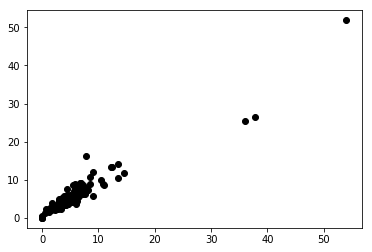

In [225]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_teste, y_prede))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_teste, y_prede))

# Plot outputs
plt.scatter(y_teste, y_prede,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()

FIP Prediction Model

In [226]:
# Fitting Random Forest to the dataset
from sklearn.ensemble import RandomForestRegressor
forestf = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,
    random_state=0,
    max_features = 'sqrt',
    
    )

forestf.fit(X_trainf, y_trainf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [227]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
featureimpfip = forestf.feature_importances_
featureimpfip

array([0.016687, 0.002922, 0.065864, 0.053545, 0.033912, 0.032196,
       0.000839, 0.030660, 0.006125, 0.002160, 0.030502, 0.003623,
       0.027872, 0.003766, 0.169590, 0.205387, 0.037322, 0.002153,
       0.001499, 0.000982, 0.222414, 0.049979])

In [228]:
y_predf = forestf.predict(X_testf)

Mean squared error: 2.39
Variance score: 0.62


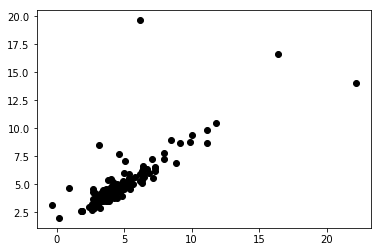

In [229]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_testf, y_predf))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_testf, y_predf))

# Plot outputs
plt.scatter(y_testf, y_predf,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()

### Tunning Random Forests



import time
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None]
              }

cv_rf = GridSearchCV(forestf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_trainf, y_trainf)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

ERA Plus Prediction Model

# Using the models to predict our Elements

In [267]:
scoreinn = pd.read_csv('scin.csv')

In [268]:
scoreinn.head


<bound method NDFrame.head of      Year Team        Split   2B  3B    AB     BA  BAbip   BB  CS ...   HR  \
0    2018  ARI  Innings 1-3   88  19  1852  0.256  0.303  186   6 ...   79   
1    2018  ARI  Innings 4-6   81  14  1797  0.221  0.276  188   7 ...   45   
2    2018  ARI  Innings 7-9   77  17  1665  0.225  0.275  165  10 ...   50   
3    2018  ARI   1st inning   33   8   659  0.290  0.341   84   2 ...   34   
4    2018  ARI   3rd inning   29   5   606  0.246  0.290   54   2 ...   24   
5    2018  ARI   4th inning   38   5   614  0.248  0.307   72   1 ...   18   
6    2018  ARI   7th inning   31   7   597  0.228  0.288   64   5 ...   12   
7    2018  ARI   8th inning   18   7   605  0.231  0.276   61   3 ...   22   
8    2018  ARI   2nd inning   26   6   587  0.228  0.274   48   2 ...   21   
9    2018  ARI   6th inning   20   5   598  0.211  0.260   62   4 ...   11   
10   2018  ARI   5th inning   23   4   585  0.205  0.259   54   2 ...   16   
11   2018  ARI   9th inning   28  

In [269]:
scoreinn.isnull().sum(axis = 0)

Year     0
Team     0
Split    0
2B       0
3B       0
AB       0
BA       0
BAbip    0
BB       0
CS       0
G        0
GDP      0
GS       0
H        0
HBP      0
HR       0
IBB      0
OBP      0
OPS      0
R        0
SB       0
SF       0
SH       0
SLG      0
SO       0
dtype: int64

In [270]:
scoreinn

,Year,Team,Split,2B,3B,AB,BA,BAbip,BB,CS,...,HR,IBB,OBP,OPS,R,SB,SF,SH,SLG,SO
0,2018,ARI,Innings 1-3,88,19,1852,0.256,0.303,186,6,...,79,7,0.327,0.779,284,15,21,14,0.452,490
1,2018,ARI,Innings 4-6,81,14,1797,0.221,0.276,188,7,...,45,10,0.300,0.657,207,29,11,15,0.357,483
2,2018,ARI,Innings 7-9,77,17,1665,0.225,0.275,165,10,...,50,12,0.298,0.680,190,29,12,9,0.381,449
3,2018,ARI,1st inning,33,8,659,0.290,0.341,84,2,...,34,3,0.372,0.891,129,6,6,0,0.519,171
4,2018,ARI,3rd inning,29,5,606,0.246,0.290,54,2,...,24,2,0.314,0.743,86,5,7,7,0.429,158
5,2018,ARI,4th inning,38,5,614,0.248,0.307,72,1,...,18,4,0.334,0.747,82,6,3,5,0.414,162
6,2018,ARI,7th inning,31,7,597,0.228,0.288,64,5,...,12,4,0.308,0.672,74,6,4,2,0.363,159
7,2018,ARI,8th inning,18,7,605,0.231,0.276,61,3,...,22,5,0.306,0.699,71,17,2,5,0.393,158
8,2018,ARI,2nd inning,26,6,587,0.228,0.274,48,2,...,21,2,0.289,0.689,69,4,8,7,0.400,161
9,2018,ARI,6th inning,20,5,598,0.211,0.260,62,4,...,11,3,0.287,0.603,66,18,6,4,0.316,151


In [271]:
#Splitting ERAplus plus to features vs dependent
sinn = list(range(3,25))
Xscoreinn = scoreinn.iloc[:, sinn].values

In [272]:
inningera = foreste.predict(Xscoreinn)
inningfip = forestf.predict(Xscoreinn)


In [273]:
performance = scoreinn.copy()
performance["predicted ERA"] = inningera
performance["predicted FIP"] = inningfip

In [274]:
resultstofile = pd.DataFrame(performance).to_csv('predictedinning.csv')

# PART 2

## Estimating the offensive team ERA, ERA+, FIP based on PA

### Training the model with what pitchers can do

In [281]:
pa_era = pd.read_csv('ippa.csv')
pa_era.drop(['FIP', 'ERA+'], axis=1, inplace=True)
pa_fip = pd.read_csv('ippa.csv')
pa_fip.drop(['ERA', 'ERA+'], axis=1, inplace=True)

PRE-PROCESSING DATA

In [282]:
pa_era.columns.get_loc("ERA")

4

In [283]:
pa_era.shape

(799, 35)

In [284]:
pa_era = pa_era.dropna()

In [285]:
pa_era.isnull().sum(axis = 0)

Player    0
Tm        0
Age       0
Year      0
ERA       0
2B        0
3B        0
AB        0
BA        0
BAbip     0
BB        0
BF        0
BK        0
CG        0
CS        0
ER        0
G         0
GDP       0
GF        0
GS        0
H         0
HBP       0
HR        0
IBB       0
IP        0
OBP       0
OPS       0
R         0
SB        0
SF        0
SH        0
SHO       0
SLG       0
SO        0
SV        0
dtype: int64

In [286]:
pa_fip.columns.get_loc("FIP")

4

In [287]:
pa_fip.shape

(799, 35)

In [288]:
pa_fip = pa_fip.dropna()

In [289]:
pa_fip.isnull().sum(axis = 0)

Player    0
Tm        0
Age       0
Year      0
FIP       0
2B        0
3B        0
AB        0
BA        0
BAbip     0
BB        0
BF        0
BK        0
CG        0
CS        0
ER        0
G         0
GDP       0
GF        0
GS        0
H         0
HBP       0
HR        0
IBB       0
IP        0
OBP       0
OPS       0
R         0
SB        0
SF        0
SH        0
SHO       0
SLG       0
SO        0
SV        0
dtype: int64

In [290]:
#Splitting ERA to features vs dependent
paera = list(range(5,35))
X2e = pa_era.iloc[:, paera].values
y2e = pa_era.iloc[:, 4].values


#Splitting FIP to features vs dependent
pafip = list(range(5,35))
X2f = pa_fip.iloc[:, pafip].values
y2f = pa_fip.iloc[:, 4].values


In [291]:
# Splitting the dataset into the Training set and Test set

Xp_traine, Xp_teste, yp_traine, yp_teste = train_test_split(X2e, y2e, test_size=0.2, random_state=0)
Xp_trainf, Xp_testf, yp_trainf, yp_testf = train_test_split(X2f, y2f, test_size=0.2, random_state=0)

### Random Forests

ERA Prediction Model

In [250]:
# Fitting Random Forest to the dataset
forestep = RandomForestRegressor(
    n_estimators=100,
    random_state=0)

forestep.fit(Xp_traine, yp_traine)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [251]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
forestep.feature_importances_

array([0.004542, 0.000463, 0.005596, 0.031338, 0.016374, 0.006418,
       0.005334, 0.000924, 0.000002, 0.000198, 0.016799, 0.002386,
       0.001775, 0.002667, 0.000282, 0.005748, 0.000814, 0.001144,
       0.003097, 0.016012, 0.529052, 0.303448, 0.010317, 0.000475,
       0.000457, 0.000367, 0.000001, 0.031041, 0.002797, 0.000131])

In [252]:
yp_prede = forestep.predict(Xp_teste)

Mean squared error: 3.01
Variance score: 0.91


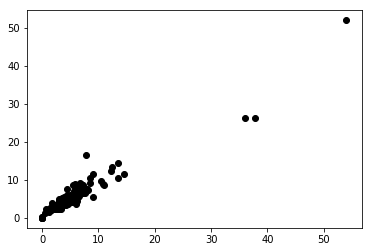

In [253]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(yp_teste, yp_prede))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(yp_teste, yp_prede))

# Plot outputs
plt.scatter(yp_teste, yp_prede,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()

FIP Prediction Model

In [254]:
# Fitting Random Forest to the dataset
from sklearn.ensemble import RandomForestRegressor
forestfp = RandomForestRegressor(
    n_estimators=100,
    random_state=0)

forestfp.fit(Xp_trainf, yp_trainf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [255]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
forestfp.feature_importances_

array([0.008879, 0.001821, 0.018890, 0.008226, 0.036782, 0.010272,
       0.014599, 0.000109, 0.000003, 0.000149, 0.004297, 0.002044,
       0.001744, 0.001582, 0.000433, 0.011175, 0.001734, 0.005034,
       0.000910, 0.023895, 0.250283, 0.352661, 0.006238, 0.000425,
       0.000275, 0.000308, 0.000004, 0.228225, 0.008937, 0.000067])

In [256]:
yp_predf = forestfp.predict(Xp_testf)

Mean squared error: 3.93
Variance score: 0.37


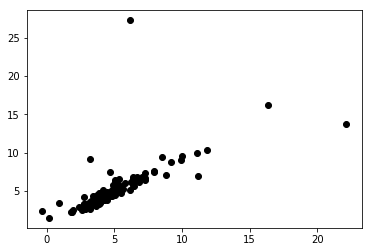

In [257]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(yp_testf, yp_predf))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(yp_testf, yp_predf))

# Plot outputs
plt.scatter(yp_testf, yp_predf,  color='black')
# plt.plot(test, prediction, color='blue', linewidth=3)


plt.show()

# Using the models to predict our Elements

In [319]:
scorepa = pd.read_csv('scorepa.csv')

In [320]:
scorepa.head

<bound method NDFrame.head of      Year Team                Split         ER        ERA         2B  \
0    2018  CLE  3rd+ PA in G, as RP   1.333333  12.000000   0.333333   
1    2018  BAL  3rd+ PA in G, as RP   0.666667   9.000000   0.000000   
2    2018  TEX  3rd+ PA in G, as RP   2.000000   4.500000   1.333333   
3    2018  MIA   2nd PA in G, as RP  11.666667   3.183333   3.666667   
4    2018  NYY  3rd+ PA in G, as RP   0.333333   3.000000   0.666667   
5    2018  DET   2nd PA in G, as RP   6.000000   2.746667   1.333333   
6    2018  CHW  4th+ PA in G, as SP   5.000000   2.546667   2.000000   
7    2018  MIN  3rd+ PA in G, as RP   1.000000   2.453333   0.333333   
8    2018  PHI   2nd PA in G, as RP   4.333333   2.206667   1.666667   
9    2018  TOR   3rd PA in G, as SP  43.666667   2.170000  14.333333   
10   2018  NYM   2nd PA in G, as RP   4.333333   2.090000   2.333333   
11   2018  OAK  4th+ PA in G, as SP   2.333333   2.033333   1.000000   
12   2018  SDP   2nd PA in G, as R

In [321]:
scorepa.isnull().sum(axis = 0)

Year     0
Team     0
Split    0
ER       0
ERA      0
2B       0
3B       0
AB       0
BA       0
BAbip    0
BB       0
BF       0
BK       0
CG       0
CS       0
G        0
GDP      0
GF       0
GS       0
H        0
HBP      0
HR       0
IBB      0
IP       0
OBP      0
OPS      0
R        0
SB       0
SF       0
SH       0
SHO      0
SLG      0
SO       0
SV       0
dtype: int64

In [322]:
scorepa.shape

(203, 34)

In [323]:
scorepa.head

<bound method NDFrame.head of      Year Team                Split         ER        ERA         2B  \
0    2018  CLE  3rd+ PA in G, as RP   1.333333  12.000000   0.333333   
1    2018  BAL  3rd+ PA in G, as RP   0.666667   9.000000   0.000000   
2    2018  TEX  3rd+ PA in G, as RP   2.000000   4.500000   1.333333   
3    2018  MIA   2nd PA in G, as RP  11.666667   3.183333   3.666667   
4    2018  NYY  3rd+ PA in G, as RP   0.333333   3.000000   0.666667   
5    2018  DET   2nd PA in G, as RP   6.000000   2.746667   1.333333   
6    2018  CHW  4th+ PA in G, as SP   5.000000   2.546667   2.000000   
7    2018  MIN  3rd+ PA in G, as RP   1.000000   2.453333   0.333333   
8    2018  PHI   2nd PA in G, as RP   4.333333   2.206667   1.666667   
9    2018  TOR   3rd PA in G, as SP  43.666667   2.170000  14.333333   
10   2018  NYM   2nd PA in G, as RP   4.333333   2.090000   2.333333   
11   2018  OAK  4th+ PA in G, as SP   2.333333   2.033333   1.000000   
12   2018  SDP   2nd PA in G, as R

In [324]:
sp = list(range(3,33))
Xscorep = scorepa.iloc[:, sp].values
Xscorep

array([[1.333333, 12.000000, 0.333333, ..., 0.000000, 0.875000, 0.000000],
       [0.666667, 9.000000, 0.000000, ..., 0.000000, 0.667000, 0.000000],
       [2.000000, 4.500000, 1.333333, ..., 0.000000, 0.739000, 0.666667],
       ...,
       [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.263000, 1.333333],
       [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.190000, 1.666667],
       [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.091000, 1.000000]])

In [325]:
paera = forestep.predict(Xscorep)
pafip = forestfp.predict(Xscorep)

In [326]:
performancep = scorepa.copy()
performancep["predicted ERA"] = paera
performancep["predicted FIP"] = pafip

In [327]:
performancep

,Year,Team,Split,ER,ERA,2B,3B,AB,BA,BAbip,...,R,SB,SF,SH,SHO,SLG,SO,SV,predicted ERA,predicted FIP
0,2018,CLE,"3rd+ PA in G, as RP",1.333333,12.000000,0.333333,0.000000,2.666667,0.250000,0.250000,...,2.000000,0.000000,0.000000,0.333333,0,0.875,0.000000,0,1.5117,3.8115
1,2018,BAL,"3rd+ PA in G, as RP",0.666667,9.000000,0.000000,0.000000,1.000000,0.222333,0.166667,...,0.333333,0.000000,0.333333,0.000000,0,0.667,0.000000,0,0.7465,0.8617
2,2018,TEX,"3rd+ PA in G, as RP",2.000000,4.500000,1.333333,0.333333,7.666667,0.159333,0.166667,...,2.000000,0.000000,0.333333,0.000000,0,0.739,0.666667,0,53.2559,23.8840
3,2018,MIA,"2nd PA in G, as RP",11.666667,3.183333,3.666667,0.333333,47.000000,0.108667,0.107333,...,14.000000,0.000000,1.000000,0.000000,0,0.589,6.000000,0,49.7478,22.8953
4,2018,NYY,"3rd+ PA in G, as RP",0.333333,3.000000,0.666667,0.000000,1.666667,0.133333,0.166667,...,0.333333,0.000000,0.000000,0.000000,0,0.800,0.333333,0,0.7886,1.5623
5,2018,DET,"2nd PA in G, as RP",6.000000,2.746667,1.333333,0.000000,28.333333,0.121667,0.129333,...,7.333333,0.000000,0.666667,0.000000,0,0.588,5.000000,0,54.6180,24.0794
6,2018,CHW,"4th+ PA in G, as SP",5.000000,2.546667,2.000000,0.000000,20.000000,0.127667,0.136000,...,4.000000,0.000000,0.000000,0.000000,0,0.633,2.666667,0,51.1986,23.8344
7,2018,MIN,"3rd+ PA in G, as RP",1.000000,2.453333,0.333333,0.000000,5.333333,0.104333,0.100000,...,1.000000,0.000000,0.000000,0.000000,0,0.750,1.333333,0,54.9780,24.4747
8,2018,PHI,"2nd PA in G, as RP",4.333333,2.206667,1.666667,0.333333,21.333333,0.078000,0.085000,...,5.333333,0.000000,1.000000,0.000000,0,0.438,4.666667,0,52.9859,23.7553
9,2018,TOR,"3rd PA in G, as SP",43.666667,2.170000,14.333333,2.000000,250.666667,0.100667,0.105667,...,50.333333,0.333333,2.666667,1.000000,0,0.535,43.333333,0,43.4754,22.4566


In [328]:
resultstofile = pd.DataFrame(performancep).to_csv('predictedpa.csv')

# THE END